# Validación de un Modelo de Regresión

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Carguemos el dataset de "Advertising.csv"
data = pd.read_csv("C:/Users/neosb/Downloads/python-ml-course-master/datasets/ads/Advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### 1. Crear conjuntos de Entrenamiento (Training) y Prueba (Testing)

[-0.28119917  1.42174677  0.96341487  1.07419425  0.76674111 -0.33212624
 -1.40775099 -1.44235338 -0.76276388  1.63433927  1.60946815  0.77631292
 -1.68227979  0.45663413  0.0869723  -0.46210837  1.2832273   0.19327719
 -0.78663425  1.46931529  1.1217335   0.07263315  0.17759905 -0.92125215
 -0.68093079  0.31788437 -0.47172014 -1.24481417 -1.79434003 -0.08077067
  1.16546025 -0.83537711 -1.12852237  0.76109722  1.85304283  0.24758782
 -0.11660657  1.36205005  0.39259063 -0.40129016 -0.37679602 -0.16826655
 -0.70797659 -0.95729859 -0.14911878 -0.48227976 -0.49781742 -1.62098826
 -0.17882936 -0.04597317  0.15664366 -0.58198442  0.56490099  0.04469119
  0.4644569   0.41534245 -0.60648426 -0.80226502 -0.45397233  0.53207382
  1.03525092 -0.43261996 -0.25248481  0.70332304  0.09754414 -0.81172859
  0.71679981  1.26903089 -2.37363756 -1.19303589  0.62135158  1.66504307
  0.20593835  0.22185878 -0.24599595  1.91570383  0.09673429  0.86375308
  0.14476954  0.45755054 -1.03019997  0.89075222  0

(array([ 3.,  7., 15., 31., 48., 41., 34., 15.,  5.,  1.]),
 array([-2.86561898, -2.27236189, -1.67910481, -1.08584772, -0.49259063,
         0.10066645,  0.69392354,  1.28718062,  1.88043771,  2.4736948 ,
         3.06695188]),
 <BarContainer object of 10 artists>)

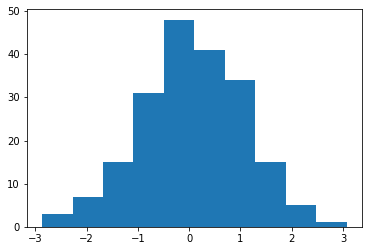

In [10]:
a = np.random.randn(len(data))
print(a)
plt.hist(a)

In [11]:
check = (a<0.8)
print(check)

[ True False False False  True  True  True  True  True False False  True
  True  True  True  True False  True  True False False  True  True  True
  True  True  True  True  True  True False  True  True  True False  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True False  True  True  True False
  True  True  True False  True False  True  True  True False  True  True
  True  True  True  True  True  True  True  True False  True  True  True
 False  True  True  True False  True False  True  True  True  True  True
  True  True  True False  True False False False  True  True False False
  True  True  True False  True  True  True False  True  True False  True
  True  True  True  True False  True  True  True  True False False  True
 False  True False  True  True  True  True  True  True  True  True  True
  True  True  True False False  True False  True Fa

In [12]:
training = data[check]
testing = data[~check]
print("No. de datos de Entrenaminto = ",len(training))
print("No. de datos de Prueba = ",len(testing))

No. de datos de Entrenaminto =  152
No. de datos de Prueba =  48


### 2. Construir el modelo de regresión utilizando los datos de entrenamiento


In [13]:
import statsmodels.formula.api as smf

In [14]:
lm = smf.ols(formula="Sales~TV+Radio+Newspaper", data=training).fit()
lm.params

Intercept    2.956078
TV           0.045309
Radio        0.196153
Newspaper   -0.000542
dtype: float64

### 3. Validar el modelo de regresión mediante los datos de prueba

In [18]:
sales_pred = lm.predict(testing[["TV","Radio","Newspaper"]])
print(sales_pred)

1      12.656694
2      12.701262
3      17.889769
9      12.507265
10      7.075556
16     13.145429
19     14.307761
20     18.256002
30     21.754720
34      7.562725
37     16.005840
60      5.760801
67     12.106274
71     10.718784
75     12.245238
77     13.998449
81     14.605334
92     19.358939
96     12.592416
100    13.849201
102    17.621126
111    21.348442
113    16.487740
114    15.660493
115    13.195562
118    15.846511
119     6.961432
123    15.313762
127     6.584849
130    10.750748
136    11.760918
141    18.635224
142    19.438394
144    10.196760
146    15.261901
159    12.513701
160    14.305564
162    15.028737
164    11.146784
166    11.130759
167    13.335400
171    14.483272
178    15.931303
185    21.080252
188    18.638892
191     8.492088
196     8.180919
197    12.796475
dtype: float64


In [19]:
# Calcular el valor del "RSE" resultante de la validación del modelo
k = 2 # Número de Variables Predictoras
SSD = np.sum((testing["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(testing)-k-1))
print("SSD = ", SSD)
print("RSE = ", RSE)

SSD =  215.80635360889582
RSE =  2.189907931138739


In [20]:
# Calcular el "RSE_%"
RSE_ratio = RSE/np.mean(testing["Sales"])
print("RSE_% = ", RSE_ratio)

RSE_% =  0.1661381076255089
